#**Install Requirement Library**

In [62]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

#**Import Library**

In [63]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [64]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us


In [65]:
df = merged_df

In [66]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df_selected_columns.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18T20:54:33.750Z,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18T16:24:03.050Z,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30T03:12:37.000Z,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27T08:26:43.780Z,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25T22:53:29.970Z,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24T13:15:29.310Z,32.402,58.890,33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us
6,1987-11-24T11:23:16.900Z,32.658,59.105,40.6,5.3,mw,us,usp0003af8,2022-04-27T21:30:18.808Z,earthquake,reviewed,us,hrv
7,1987-11-09T16:43:42.250Z,32.805,47.799,42.1,4.9,mb,us,usp0003a0e,2014-11-07T00:41:12.852Z,earthquake,reviewed,us,us
8,1987-11-03T14:26:41.410Z,28.420,50.439,10.0,4.6,mb,us,usp00039v1,2014-11-07T00:41:11.061Z,earthquake,reviewed,us,us
9,1987-10-28T21:47:25.220Z,27.627,56.374,45.8,4.7,mb,us,usp00039q3,2014-11-07T00:41:07.614Z,earthquake,reviewed,us,us


In [67]:
df = df_selected_columns

#**Variable Description**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879 entries, 0 to 3878
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            3879 non-null   object 
 1   latitude        3879 non-null   float64
 2   longitude       3879 non-null   float64
 3   depth           3879 non-null   float64
 4   mag             3879 non-null   float64
 5   magType         3879 non-null   object 
 6   net             3879 non-null   object 
 7   id              3879 non-null   object 
 8   updated         3879 non-null   object 
 9   type            3879 non-null   object 
 10  status          3879 non-null   object 
 11  locationSource  3879 non-null   object 
 12  magSource       3879 non-null   object 
dtypes: float64(4), object(9)
memory usage: 394.1+ KB


#**Magnitude Type**

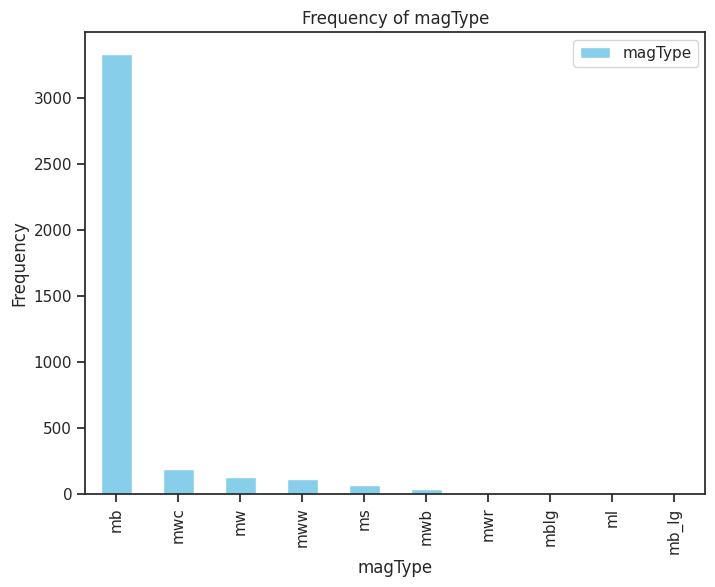

In [69]:
# Menghitung frekuensi setiap jenis 'magType'
magtype_counts = df['magType'].value_counts()

# Buat plot bar
plt.figure(figsize=(8, 6))
magtype_counts.plot(kind='bar', color='skyblue')

# Beri label sumbu x dan y serta judul grafik
plt.xlabel('magType')
plt.ylabel('Frequency')
plt.title('Frequency of magType')

# Tampilkan legenda
plt.legend(['magType'])

# Tampilkan grafik
plt.show()


#**Correlation Variable**

The correlation matrix showcases the relationships between the numeric variables within the dataset. For instance:

Positive Correlation: If two variables have a value close to +1, it implies a strong positive relationship. For instance, if variables A and B have a correlation coefficient of 0.8, it suggests that as variable A increases, variable B also tends to increase.

Negative Correlation: If two variables have a value close to -1, it signifies a strong negative relationship. For example, if variables C and D have a correlation coefficient of -0.6, it suggests that as variable C increases, variable D tends to decrease.

No Correlation: A correlation coefficient close to 0 indicates no linear relationship between the variables. If variables E and F have a correlation coefficient of 0.1, there's little to no linear relationship between them.

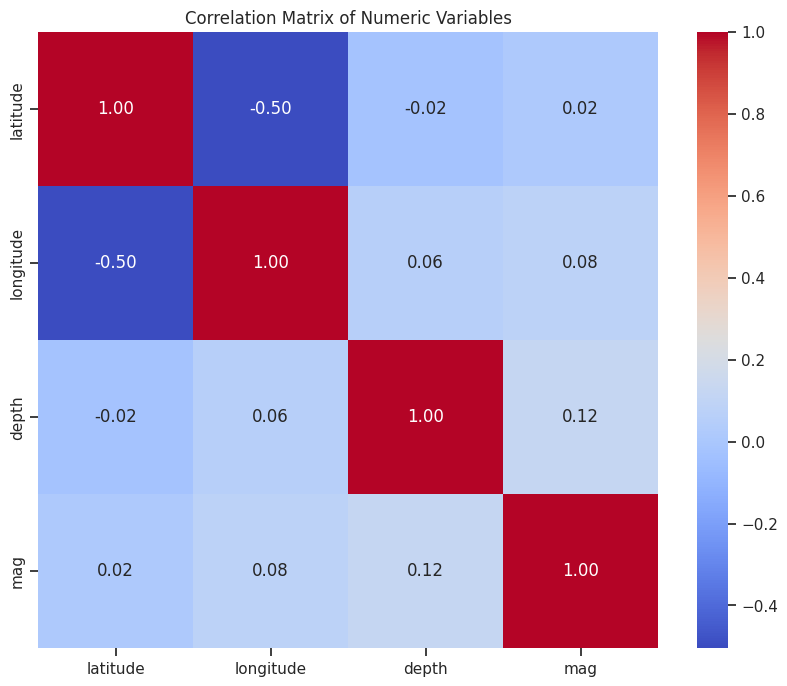

In [70]:
# Pilih kolom numerik untuk membuat matriks korelasi
numeric_data = df.select_dtypes(include='number')

# Hitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


#**Statistical Description of Earthquake Events**

In [71]:
# Total earthquake events
N_tot = df['mag'].count()
print('Total earthquake events **1972 until 2022**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2022-1972+1)),2) )
print('Average number of events per year:', round(N_tot/((2022-1972+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1972 until 2022** 3879
Average number of events per week: 1.46
Average number of events per year: 76.06
The magnitude of the largest earthquake:


,mag,time
2194,7.7,2013-04-16T10:44:20.180Z
1517,7.4,1990-06-20T21:00:09.980Z
564,7.4,1978-09-16T15:35:56.600Z
1894,7.3,2017-11-12T18:18:17.180Z
1063,7.3,1997-05-10T07:57:29.720Z


In [72]:
print('Magnitude Maximum:', df['mag'].max())
print('Magnitude Minium:', df['mag'].min())
print('Magnitude Rata-Rata:', df['mag'].mean())

Magnitude Maximum: 7.7
Magnitude Minium: 3.6
Magnitude Rata-Rata: 4.751972157772622


In [73]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

<ipython-input-73-8ce4cf583d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_time'] = df['time'].apply(lambda x:
<ipython-input-73-8ce4cf583d54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
<ipython-input-73-8ce4cf583d54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

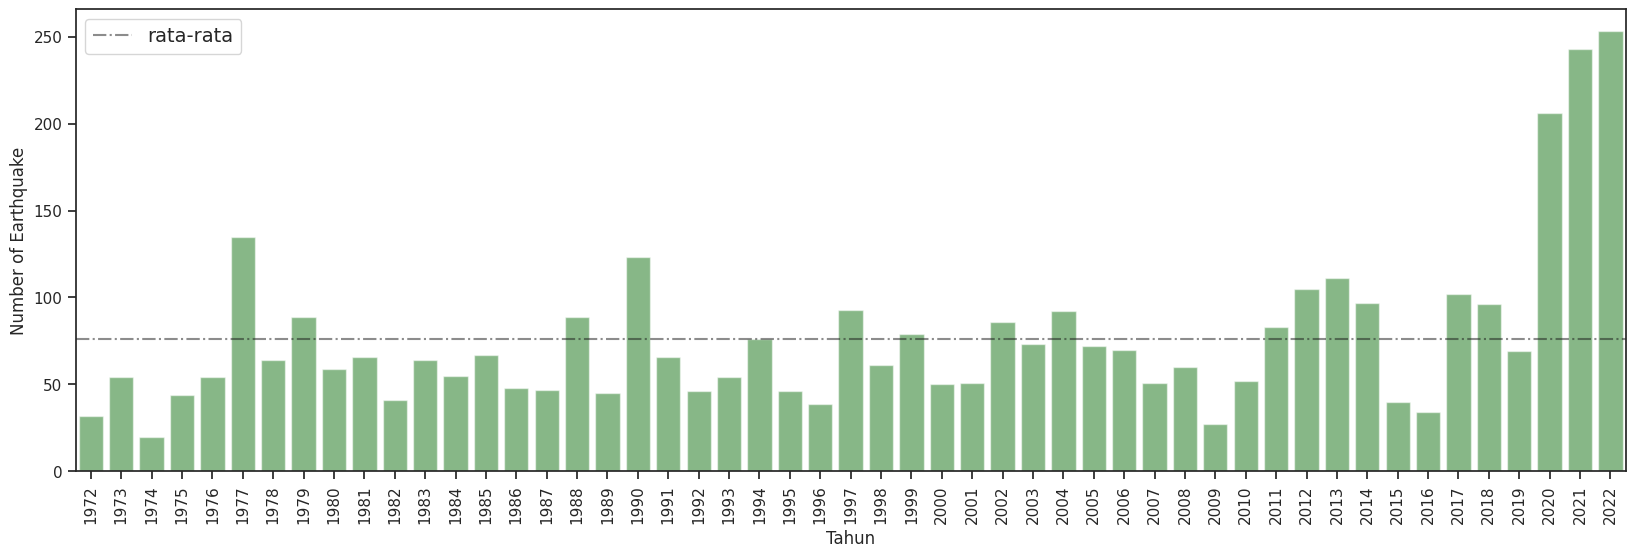

In [74]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(20,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


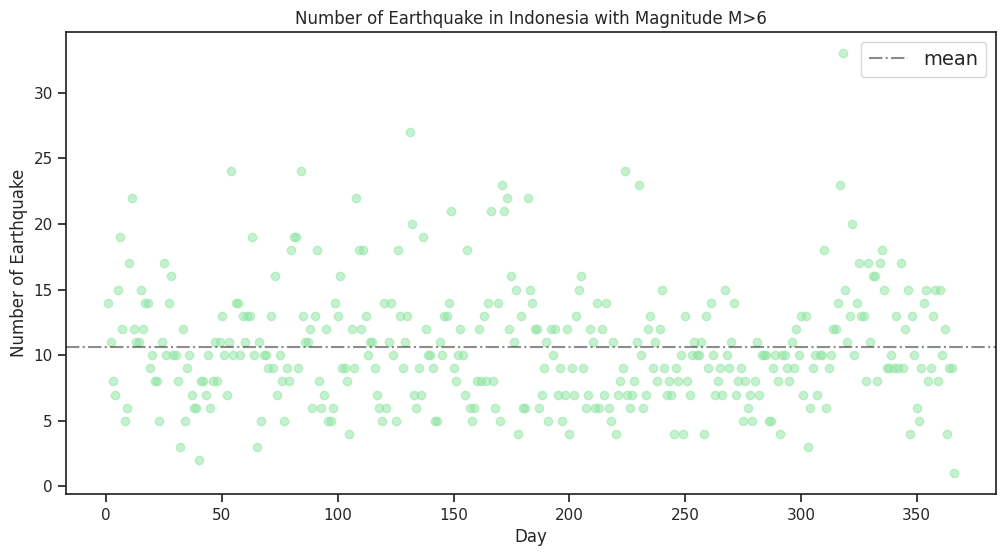

In [75]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in Indonesia with Magnitude M>6')
plt.legend()
plt.show()

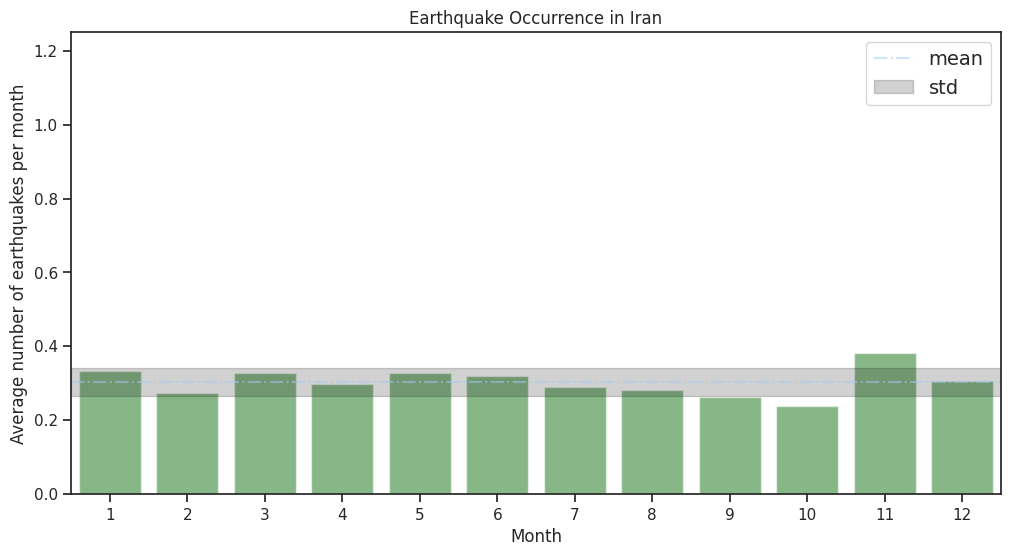

In [76]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 1.25])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Average number of earthquakes per month'), plt.xlabel('Month')
plt.title('Earthquake Occurrence in Iran')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [77]:
# Baca dataset ke dalam DataFrame
df = df

# Menentukan batas geografis berdasarkan data gempa di Iran
max_lat_iran = 39
min_lat_iran = 25
max_lon_iran = 62
min_lon_iran = 44

# Filter data hanya untuk wilayah Iran
df_iran = df[(df['latitude'] >= min_lat_iran) & (df['latitude'] <= max_lat_iran) &
             (df['longitude'] >= min_lon_iran) & (df['longitude'] <= max_lon_iran)]

# Hitung tengah wilayah data gempa di Iran
center_lat_iran = (max_lat_iran + min_lat_iran) / 2
center_lon_iran = (max_lon_iran + min_lon_iran) / 2

# Hitung tingkat zoom yang sesuai untuk memfokuskan pada wilayah dengan data gempa di Iran
zoom_level_iran = 6

# Buat peta dengan lokasi tengah wilayah data gempa di Iran
m_iran = folium.Map(location=[center_lat_iran, center_lon_iran], zoom_start=zoom_level_iran)

# Tentukan rentang magnitudo dan warna yang sesuai
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Tambahkan marker untuk setiap gempa bumi di Iran pada peta
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data_iran = df_iran[(df_iran['mag'] >= min_mag) & (df_iran['mag'] <= max_mag)]
    for index, row in mag_data_iran.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m_iran)

# Tambahkan legend ke peta dengan bar vertikal di pojok kiri bawah
legend_html = """
     <div style="position: fixed;
                 bottom: 100px; left: 10px; width: 200px; height: 160px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px; text-align:center; padding: 5px;">
     <p><b>Legend</b></p>
     <div style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 4-5<br>
     <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 5.1-6<br>
     <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 6.1-7<br>
     <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 7.1-9<br>
      </div>
     """

m_iran.get_root().html.add_child(folium.Element(legend_html))

# Menyimpan peta di Iran ke file HTML
m_iran.save("iran_earthquake_map.html")

# Tampilkan peta di dalam notebook
m_iran


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-78-5d461a950781>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-78-5d461a950781>:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


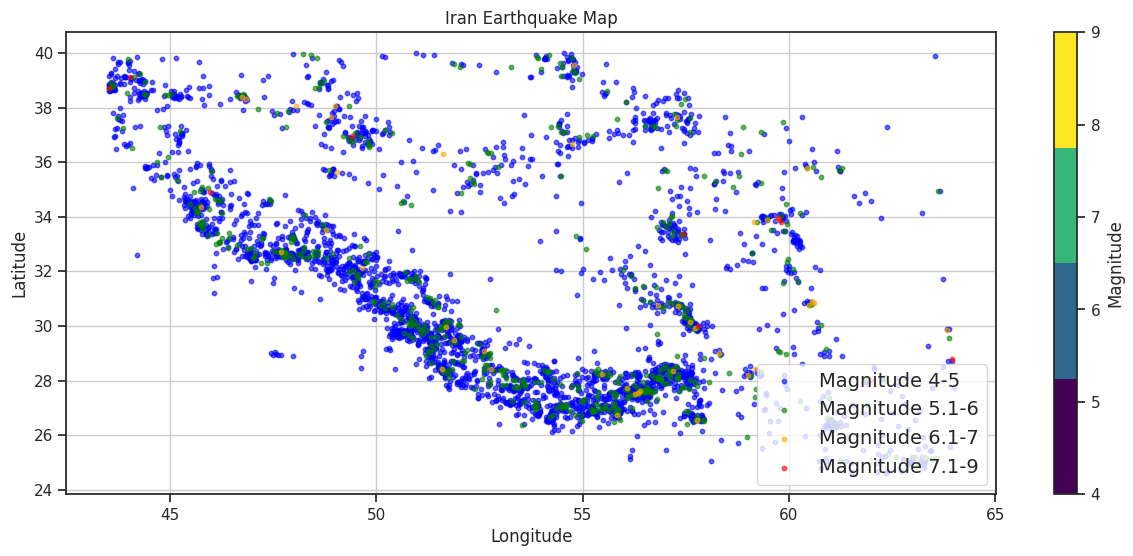

In [78]:
# Membaca dataset
df = df

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(15, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Lable and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Iran Earthquake Map')

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

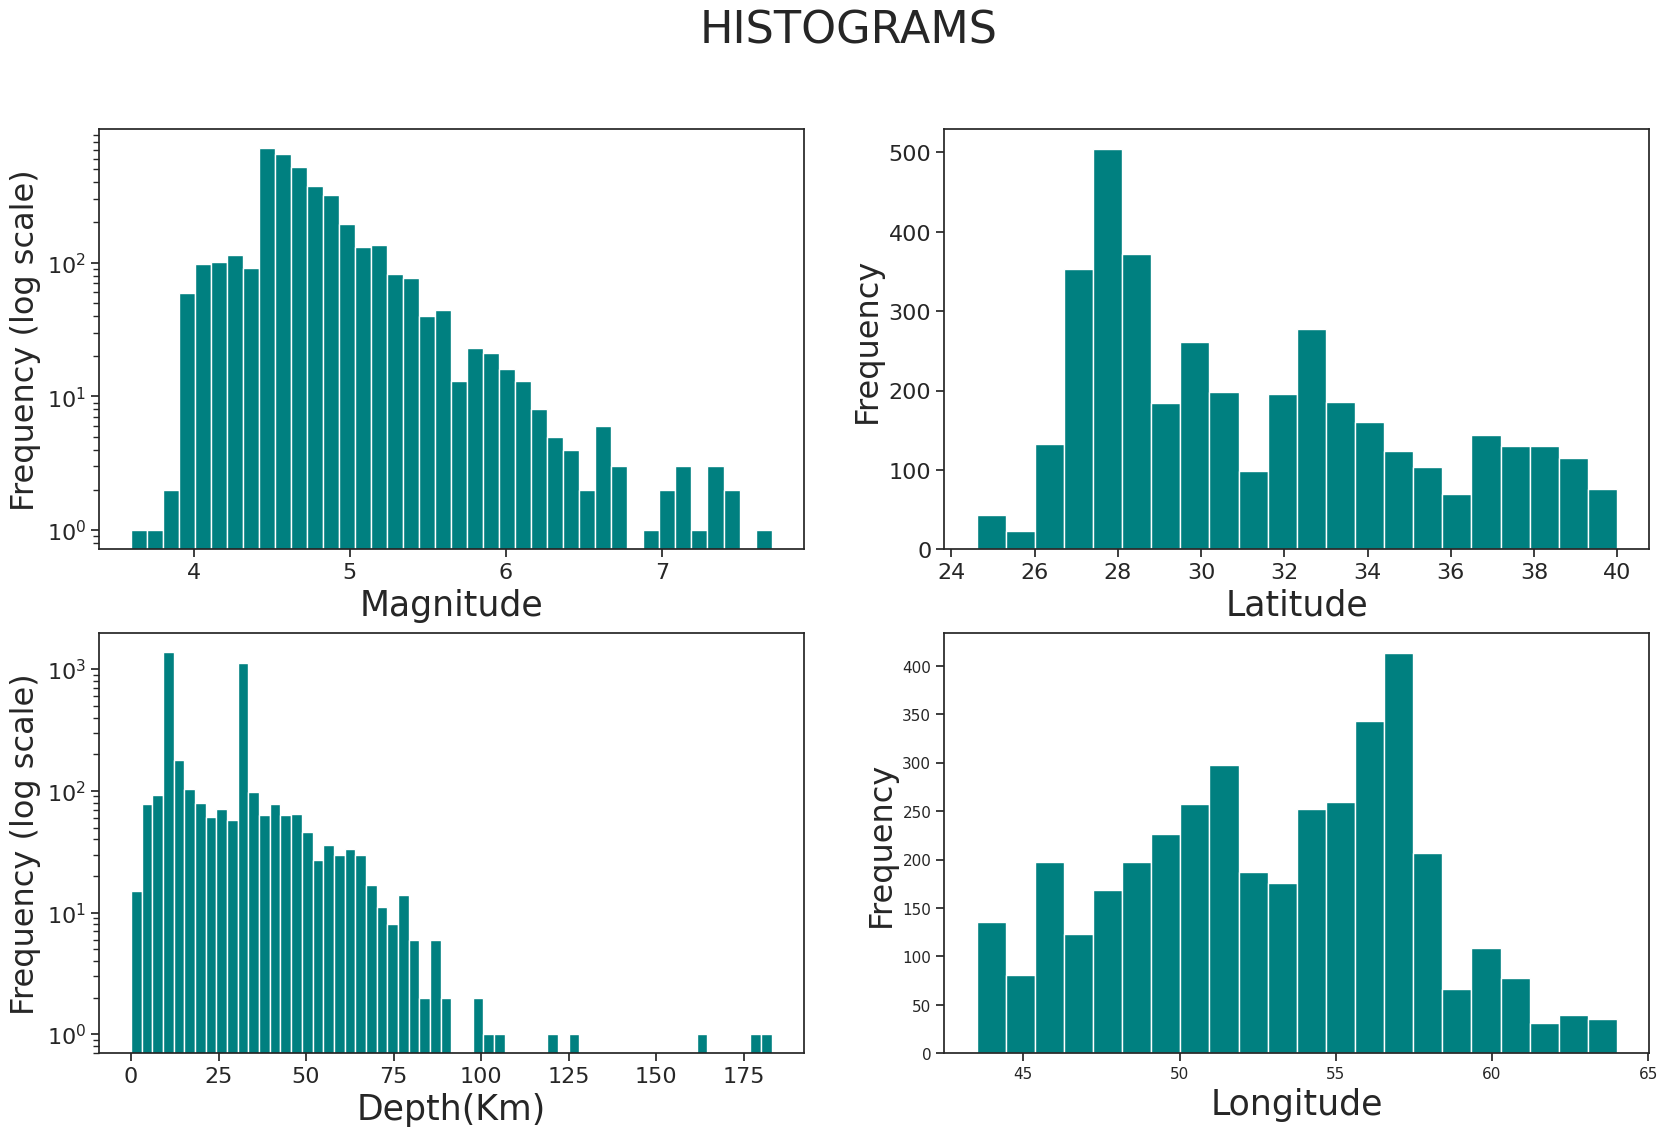

In [79]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


##**Depth, Longitude**

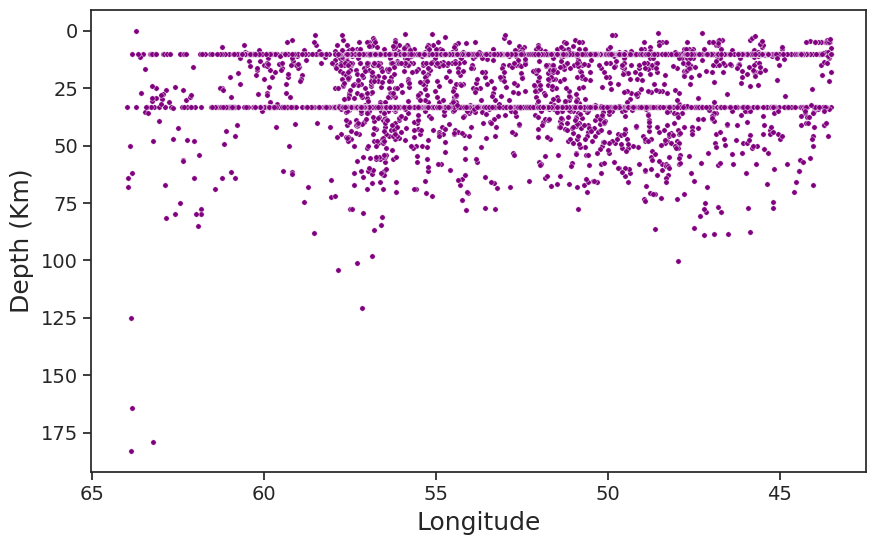

In [80]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Latitude**

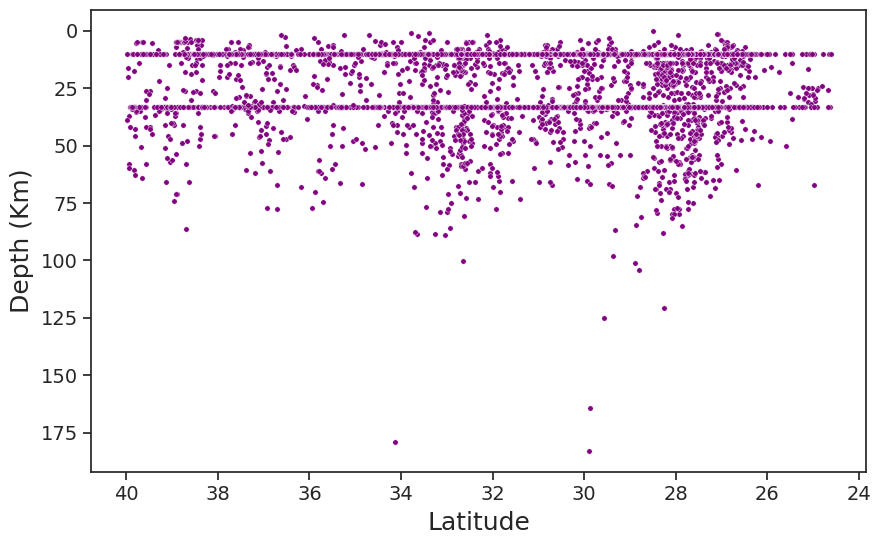

In [81]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

In [82]:
# Read dataset
df = df

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)


Range Latitude: 24.6025 until 39.9934
Range Longitude: 43.504 until 64.0


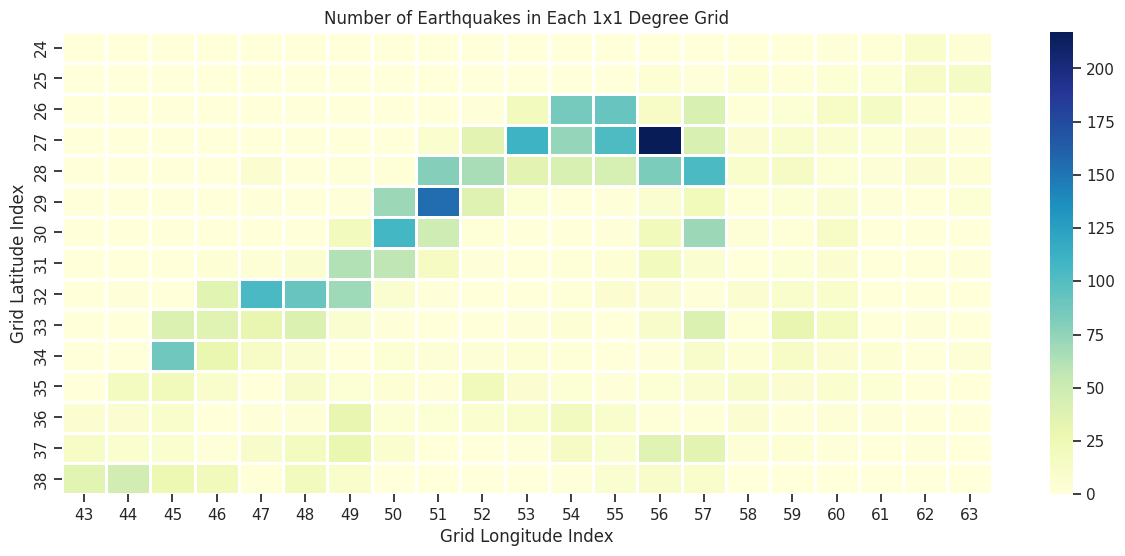

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns


# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# save a result in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display result
plt.figure(figsize=(15, 6))
sns.heatmap(grid_df, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.xlabel('Grid Longitude Index')
plt.ylabel('Grid Latitude Index')
plt.title('Number of Earthquakes in Each 1x1 Degree Grid')
plt.show()


In [84]:
import pandas as pd
import numpy as np

# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# Save in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Splitting the grid_df DataFrame into three sections of size 17x15
part1 = grid_df.iloc[:17, :10]
part2 = grid_df.iloc[:17, 10:]

# Displaying each part separately
print("Part 1:")
print(part1)
print("\nPart 2:")
print(part2)

Part 1:
    43  44  45  46   47  48  49   50   51  52
24   0   0   0   0    0   0   0    0    0   0
25   0   0   0   0    0   0   0    0    0   0
26   0   0   0   0    0   0   0    0    0   1
27   0   0   0   0    0   0   0    0    8  34
28   0   0   0   0    6   0   2    2   79  66
29   0   0   0   0    1   0   1   71  155  38
30   0   0   0   0    0   0  19  107   50   2
31   0   0   0   4    3   7  62   57   16   1
32   0   1   0  35  105  92  70    7    1   0
33   0   0  40  37   31  40   7    1    0   0
34   0   0  89  30   12   7   0    5    3   3
35   0  17  22   9    0  11   5    4    1  22
36   6   6  10   0    1   3  31    5    5   8
37  12   8   8   1   11  17  30    8    0   0
38  35  47  27  22    2  19   9    0    0   0

Part 2:
     53  54   55   56   57  58  59  60  61  62  63
24    0   0    0    0    0   0   0   1   2  10   4
25    0   0    0    4    1   4   2   5   5  13  15
26   19  86   92   13   42   2   5  13  15   4   2
27  111  73  103  217   42   6   9   7   5 